In [1]:
import pandas as pd
import numpy as np

In [2]:
file = pd.read_csv('train_spray_weather_v1.csv')

In [3]:
file.shape

(8610, 76)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [79]:
file.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent,NumMosquitos,year,month,day,dist_2011-08-29 00:00:00,dist_2011-09-07 00:00:00,dist_2013-07-17 00:00:00,dist_2013-07-25 00:00:00,dist_2013-08-08 00:00:00,dist_2013-08-15 00:00:00,dist_2013-08-16 00:00:00,dist_2013-08-22 00:00:00,dist_2013-08-29 00:00:00,dist_2013-09-05 00:00:00,days_2011-08-29 00:00:00,days_2011-09-07 00:00:00,days_2013-07-17 00:00:00,days_2013-07-25 00:00:00,days_2013-08-08 00:00:00,days_2013-08-15 00:00:00,days_2013-08-16 00:00:00,days_2013-08-22 00:00:00,days_2013-08-29 00:00:00,days_2013-09-05 00:00:00,trap_dist_st1,trap_dist_st2,Station,WeatherLat_Station,WeatherLon_Station,Tmax_Station,Tmin_Station,Tavg_Station,Depart_Station,DewPoint_Station,WetBulb_Station,Heat_Station,Cool_Station,CodeSum_Station,PrecipTotal_Station,StnPressure_Station,SeaLevel_Station,ResultSpeed_Station,ResultDir_Station,AvgSpeed_Station,Sunrise_Station,Sunset_Station,WetBulb_Station_c,Tavg_Station_c,rel_hum_station,BCFG,BR,DZ,FG,FGplus_,FU,GR,HZ,NO_EVENT,RA,SN,SQ,TS,TSRA,VCFG,VCTS
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,1,2007,5,29,42.432451,9.840987,8.553039,5.899343,3.761087,4.915996,5.653870,2.725672,5.981222,11.446059,1553,1562,2241,2249,2263,2270,2271,2277,2284,2291,16.828145,7.529955,2,41.786,-87.752,88,65,77,10,59,66.0,0,12,BR HZ,0.0,29.44,30.09,5.8,16,7.4,4:21:00,19:17:00,18.888889,25.0,55.688293,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,0,2,2007,5,29,42.432451,9.840987,8.553039,5.899343,3.761087,4.915996,5.653870,2.725672,5.981222,11.446059,1553,1562,2241,2249,2263,2270,2271,2277,2284,2291,16.828145,7.529955,2,41.786,-87.752,88,65,77,10,59,66.0,0,12,BR HZ,0.0,29.44,30.09,5.8,16,7.4,4:21:00,19:17:00,18.888889,25.0,55.688293,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,0,1,2007,5,29,42.860201,10.271628,8.220944,6.326835,4.168725,5.282698,6.067388,3.088242,5.778194,11.877982,1553,1562,2241,2249,2263,2270,2271,2277,2284,2291,17.238340,7.479372,2,41.786,-87.752,88,65,77,10,59,66.0,0,12,BR HZ,0.0,29.44,30.09,5.8,16,7.4,4:21:00,19:17:00,18.888889,25.0,55.688293,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [6]:
file['year'].unique()

array([2007, 2009, 2011, 2013])

In [7]:
file['year'].unique()

array([2007, 2009, 2011, 2013])

In [8]:
list(file)

['Date',
 'Address',
 'Species',
 'Block',
 'Street',
 'Trap',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'WnvPresent',
 'NumMosquitos',
 'year',
 'month',
 'day',
 'dist_2011-08-29 00:00:00',
 'dist_2011-09-07 00:00:00',
 'dist_2013-07-17 00:00:00',
 'dist_2013-07-25 00:00:00',
 'dist_2013-08-08 00:00:00',
 'dist_2013-08-15 00:00:00',
 'dist_2013-08-16 00:00:00',
 'dist_2013-08-22 00:00:00',
 'dist_2013-08-29 00:00:00',
 'dist_2013-09-05 00:00:00',
 'days_2011-08-29 00:00:00',
 'days_2011-09-07 00:00:00',
 'days_2013-07-17 00:00:00',
 'days_2013-07-25 00:00:00',
 'days_2013-08-08 00:00:00',
 'days_2013-08-15 00:00:00',
 'days_2013-08-16 00:00:00',
 'days_2013-08-22 00:00:00',
 'days_2013-08-29 00:00:00',
 'days_2013-09-05 00:00:00',
 'trap_dist_st1',
 'trap_dist_st2',
 'Station',
 'WeatherLat_Station',
 'WeatherLon_Station',
 'Tmax_Station',
 'Tmin_Station',
 'Tavg_Station',
 'Depart_Station',
 'DewPoint_Station',
 'WetBulb_Station',
 'Heat_Station',
 '

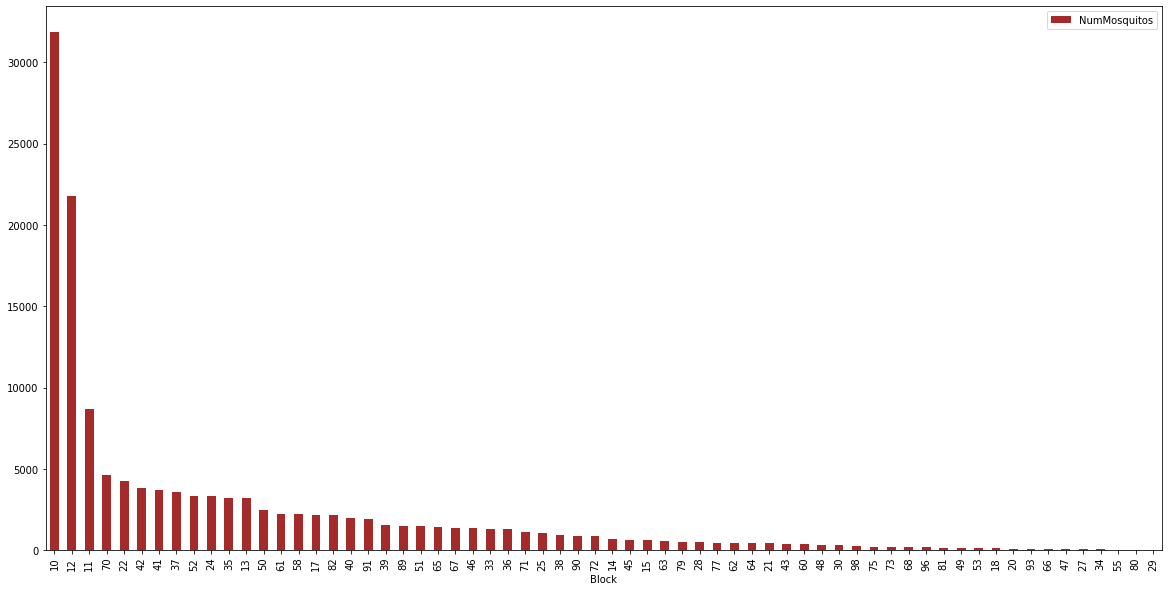

In [41]:
#overall - which block has the highest number of mosquitos
num_mosq = file.groupby('Block', as_index=False).agg({'NumMosquitos':'sum'})
num_mosq = num_mosq.sort_values(by=['NumMosquitos'],ascending=False)
num_mosq.plot(x='Block', y='NumMosquitos',kind='bar',figsize=(20,10), grid=False,color=['brown'])

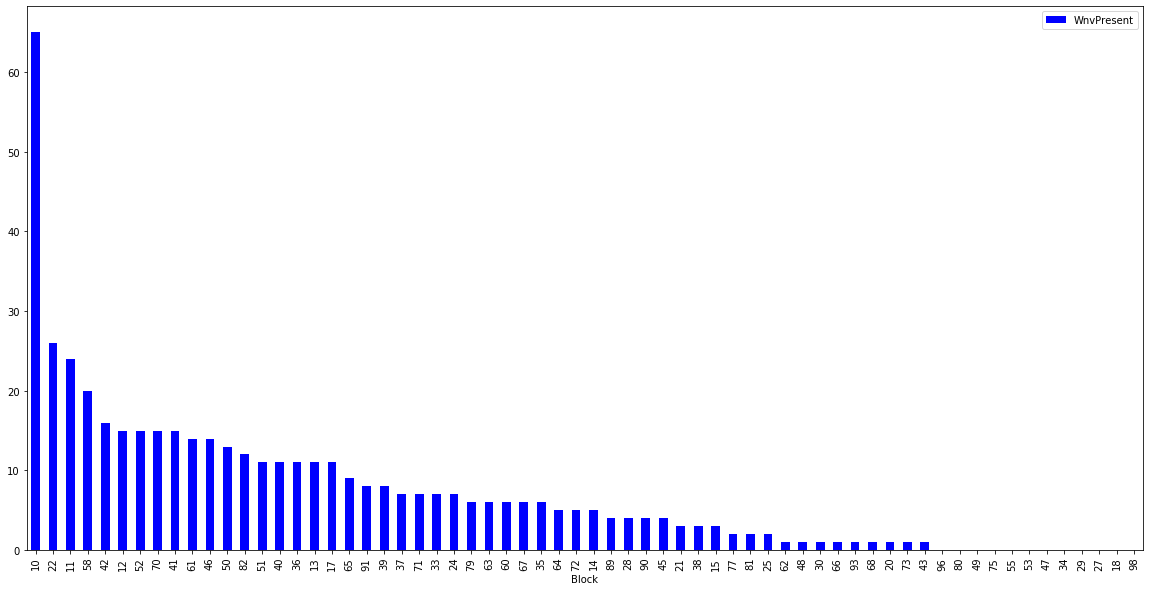

In [40]:
num_mosq = file.groupby('Block', as_index=False).agg({'WnvPresent':'sum'})
num_mosq = num_mosq.sort_values(by=['WnvPresent'],ascending=False)
num_mosq.plot(x='Block', y='WnvPresent',kind='bar',figsize=(20,10), grid=False,color=['blue'])

In [27]:
num_mosq.head()

,Block,NumMosquitos
0,10,31852
1,11,8669
2,12,21789
3,13,3190
4,14,680


In [48]:
num_mosq_wnv[num_mosq_wnv['Block']==10]

,Block,NumMosquitos,WnvPresent,pct
0,10,31852,65,0.204069


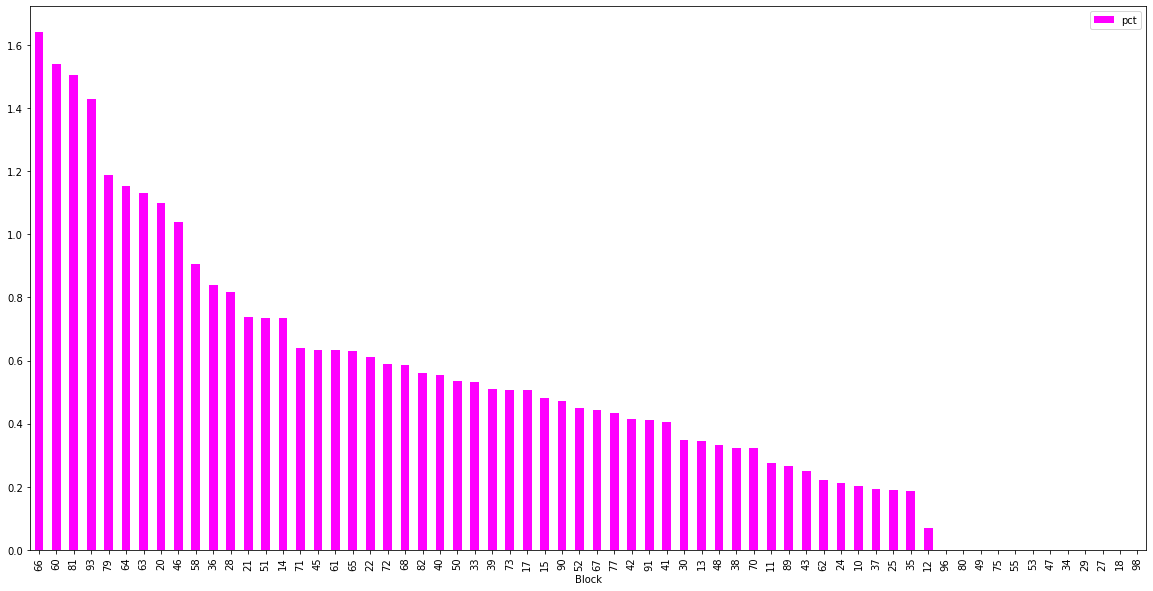

In [44]:
#Overall - of the total number of musquitos how many are infected
num_mosq_wnv = file.groupby('Block', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
num_mosq_wnv['pct'] = (num_mosq_wnv['WnvPresent']/num_mosq_wnv['NumMosquitos'])*100
num_mosq_wnv = num_mosq_wnv.sort_values(by=['pct'],ascending=False)
num_mosq_wnv.plot(x='Block', y='pct',kind='bar',figsize=(20,10), grid=False,color=['magenta'])

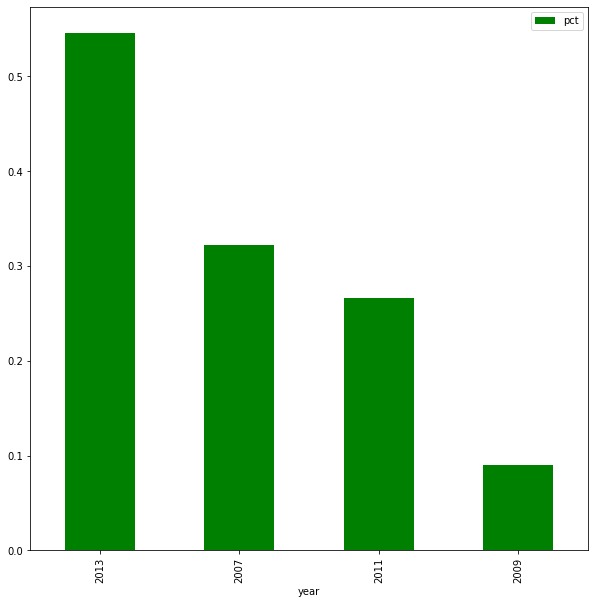

In [65]:
#Looking at virus across the years
year = file.groupby('year', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct','year'],ascending=False)
year.plot(x='year', y='pct',kind='bar',figsize=(10,10), grid=False,color=['green'])

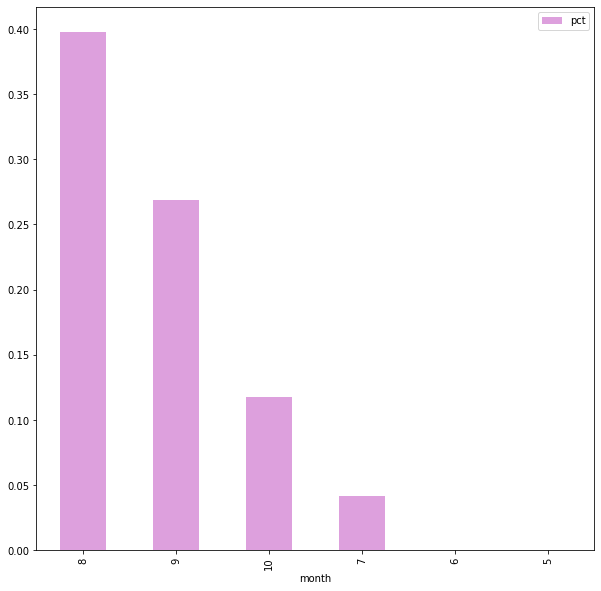

In [63]:
#Looking at virus across the months for each year

year_2007 = file[file['year']==2007]
year = year_2007.groupby('month', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct','month'],ascending=False)
year.plot(x='month', y='pct',kind='bar',figsize=(10,10), grid=False,color=['plum'])

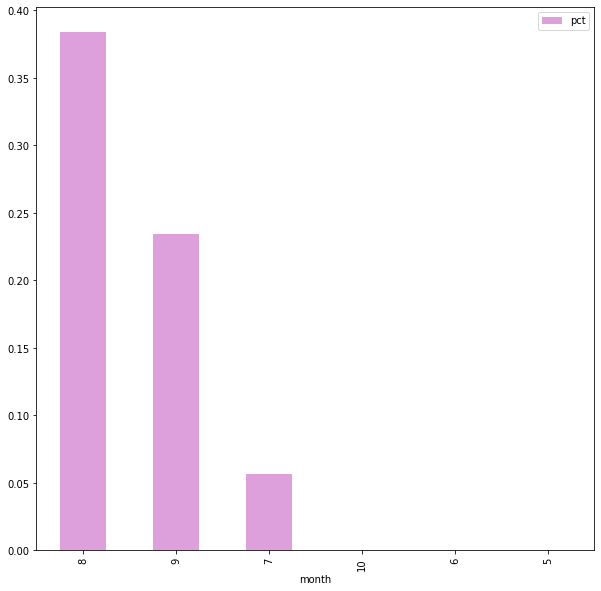

In [60]:
#within each year - month wise

year_2009 = file[file['year']==2009]
year = year_2009.groupby('month', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct','month'],ascending=False)
year.plot(x='month', y='pct',kind='bar',figsize=(10,10), grid=False,color=['plum'])

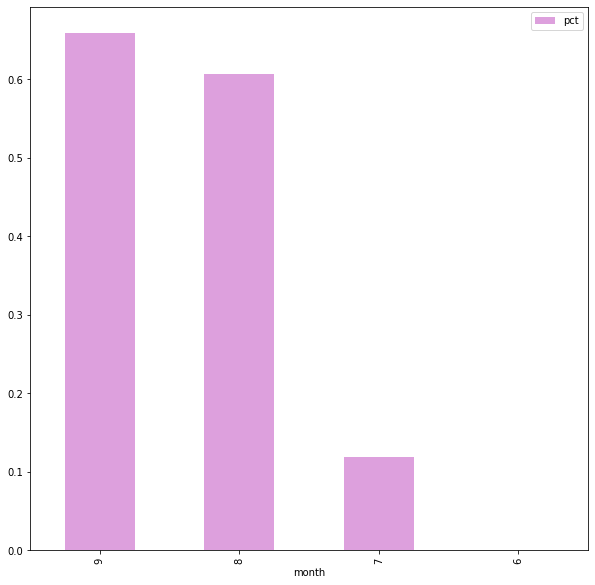

In [61]:
#within each year - month wise

year_2011 = file[file['year']==2011]
year = year_2011.groupby('month', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct','month'],ascending=False)
year.plot(x='month', y='pct',kind='bar',figsize=(10,10), grid=False,color=['plum'])

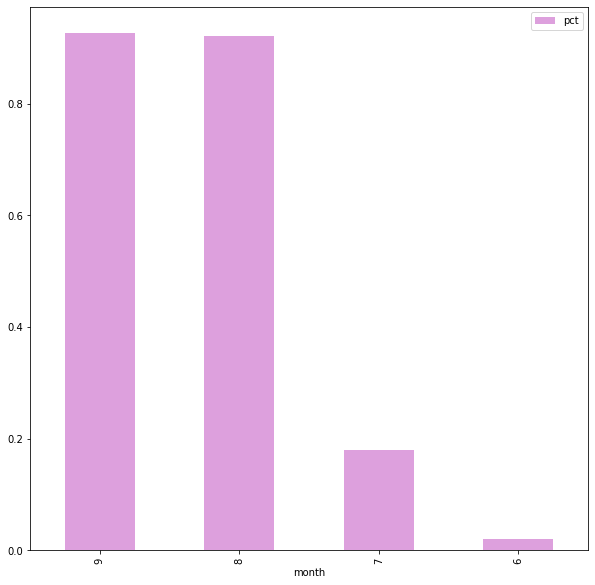

In [62]:
#within each year - month wise

year_2013 = file[file['year']==2013]
year = year_2013.groupby('month', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct','month'],ascending=False)
year.plot(x='month', y='pct',kind='bar',figsize=(10,10), grid=False,color=['plum'])

In [17]:
import matplotlib.pyplot as plt

In [ ]:
year.head()

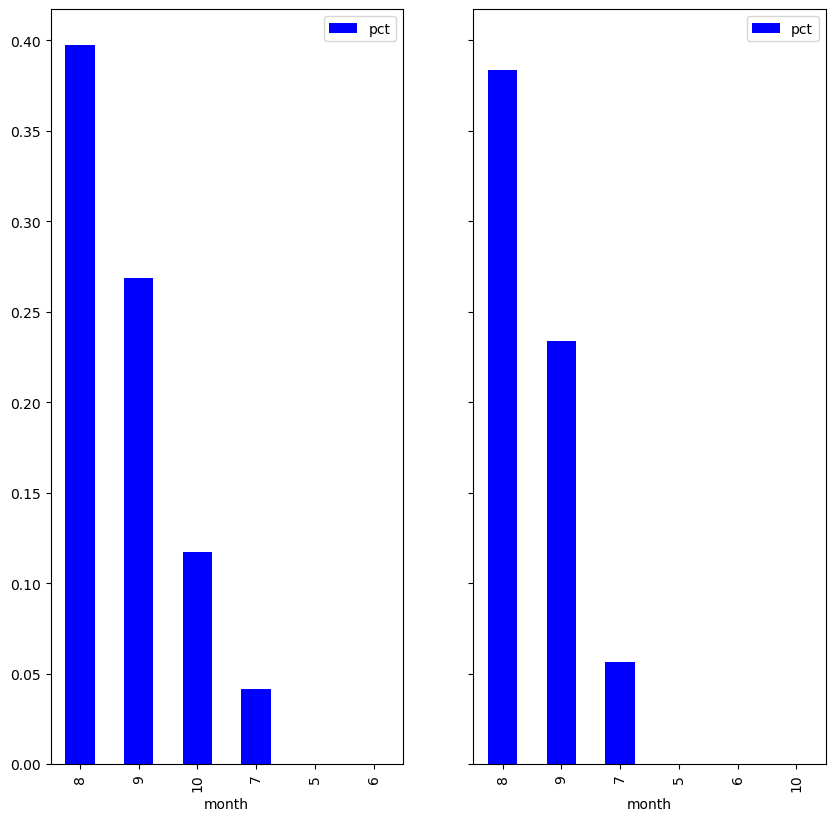

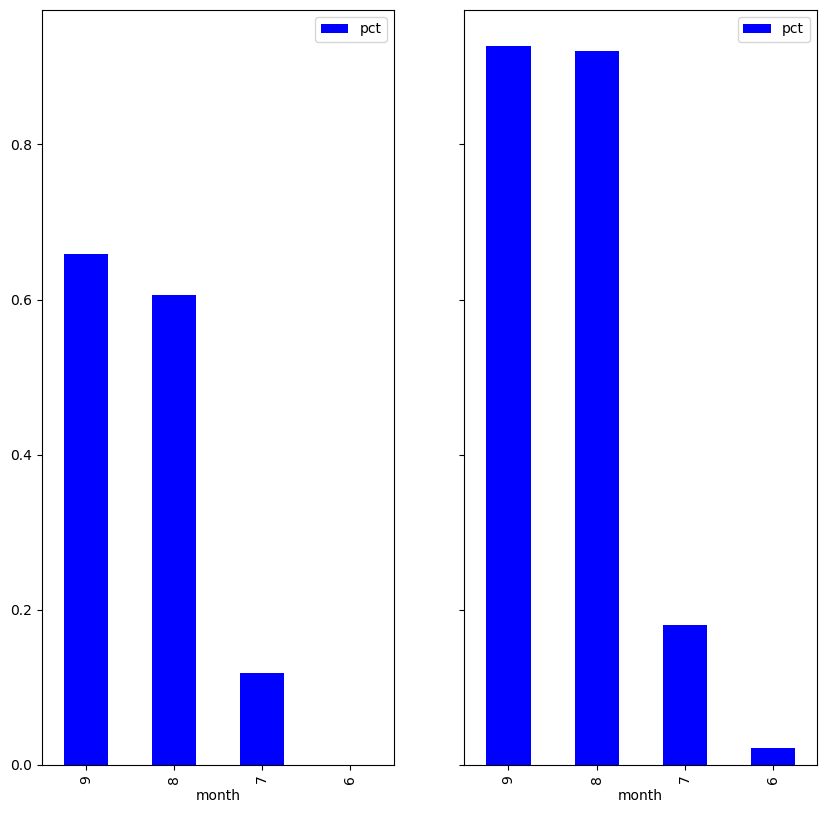

In [73]:
fig, axes = plt.subplots(1,2, figsize=(5, 5), sharey=True, dpi=100)
#2007
year_2007 = file[file['year']==2007]
year = year_2007.groupby('month', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct'],ascending=False)
year.plot(x='month', y='pct',kind='bar',ax=axes[0],figsize=(10,10), grid=False,color=['blue'])

#2009
year_2009 = file[file['year']==2009]
year = year_2009.groupby('month', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct'],ascending=False)
year.plot(x='month', y='pct',kind='bar',ax=axes[1],figsize=(10,10), grid=False,color=['blue'])

fig, axes = plt.subplots(1,2, figsize=(5, 5), sharey=True, dpi=100)
#2011
year_2011 = file[file['year']==2011]
year = year_2011.groupby('month', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct'],ascending=False)
year.plot(x='month', y='pct',kind='bar',ax=axes[0],figsize=(10,10), grid=False,color=['blue'])

#2013
year_2013 = file[file['year']==2013]
year = year_2013.groupby('month', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
year['pct'] = (year['WnvPresent']/year['NumMosquitos'])*100
year = year.sort_values(by=['pct'],ascending=False)
year.plot(x='month', y='pct',kind='bar',ax=axes[1],figsize=(10,10), grid=False,color=['blue'])

In [74]:
file_2011=file[(file.year == 2011)]
file_2011['spray_dates']= np.where(file_2011['Date'] < '2011-08-29','before 1st spray',
                                              np.where( (file_2011['Date'] >='2011-08-29' )& (file_2011['Date'] <'2011-09-07'),'b/w spray 1 and spray 2'
                                             ,'spray 2 to end of year'))

/Users/sonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [77]:
spray_effect_2011 = file_2011.groupby('spray_dates', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
spray_effect_2011

,spray_dates,NumMosquitos,WnvPresent
0,b/w spray 1 and spray 2,870,7
1,before 1st spray,15462,28
2,spray 2 to end of year,2467,15


In [81]:
file_2011.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent,NumMosquitos,year,month,day,dist_2011-08-29 00:00:00,dist_2011-09-07 00:00:00,dist_2013-07-17 00:00:00,dist_2013-07-25 00:00:00,dist_2013-08-08 00:00:00,dist_2013-08-15 00:00:00,dist_2013-08-16 00:00:00,dist_2013-08-22 00:00:00,dist_2013-08-29 00:00:00,dist_2013-09-05 00:00:00,days_2011-08-29 00:00:00,days_2011-09-07 00:00:00,days_2013-07-17 00:00:00,days_2013-07-25 00:00:00,days_2013-08-08 00:00:00,days_2013-08-15 00:00:00,days_2013-08-16 00:00:00,days_2013-08-22 00:00:00,days_2013-08-29 00:00:00,days_2013-09-05 00:00:00,trap_dist_st1,trap_dist_st2,Station,WeatherLat_Station,WeatherLon_Station,Tmax_Station,Tmin_Station,Tavg_Station,Depart_Station,DewPoint_Station,WetBulb_Station,Heat_Station,Cool_Station,CodeSum_Station,PrecipTotal_Station,StnPressure_Station,SeaLevel_Station,ResultSpeed_Station,ResultDir_Station,AvgSpeed_Station,Sunrise_Station,Sunset_Station,WetBulb_Station_c,Tavg_Station_c,rel_hum_station,BCFG,BR,DZ,FG,FGplus_,FU,GR,HZ,NO_EVENT,RA,SN,SQ,TS,TSRA,VCFG,VCTS,spray_dates
4758,2011-06-10,"1000 East 67th Street, Chicago, IL 60637, USA",CULEX RESTUANS,10,E 67TH ST,T073,"1000 E 67TH ST, Chicago, IL",41.773215,-87.600880,8,0,4,2011,6,10,49.408211,16.592335,2.912967,12.910105,10.797846,10.876336,12.140847,1.035819,4.820000,18.342115,80,89,768,776,790,797,798,804,811,818,22.940181,7.832979,2,41.786,-87.752,71,51,61,-7,56,58.0,4,0,TS TSRA BR HZ,0.44,29.26,29.92,6.1,1,7.5,4:16:00,19:26:00,14.444444,16.111111,83.657583,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,before 1st spray
4759,2011-06-10,"1100 North Artesian Avenue, Chicago, IL 60622,...",CULEX PIPIENS/RESTUANS,11,S ARTESIAN AVE,T160,"1100 S ARTESIAN AVE, Chicago, IL",41.903002,-87.688267,8,0,1,2011,6,10,39.404778,6.864293,7.624868,2.881817,1.051471,3.016626,3.058136,0.982215,5.093181,8.415566,80,89,768,776,790,797,798,804,811,818,14.085484,8.720678,2,41.786,-87.752,71,51,61,-7,56,58.0,4,0,TS TSRA BR HZ,0.44,29.26,29.92,6.1,1,7.5,4:16:00,19:26:00,14.444444,16.111111,83.657583,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,before 1st spray
4760,2011-06-10,"1100 South California Avenue, Chicago, IL 6061...",CULEX PIPIENS/RESTUANS,11,S CALIFORNIA,T047,"1100 S CALIFORNIA, Chicago, IL",41.868142,-87.696269,9,0,17,2011,6,10,41.282219,8.405572,8.811853,5.023517,3.428645,2.883810,3.956821,0.701939,5.676366,10.200501,80,89,768,776,790,797,798,804,811,818,14.990255,6.356929,2,41.786,-87.752,71,51,61,-7,56,58.0,4,0,TS TSRA BR HZ,0.44,29.26,29.92,6.1,1,7.5,4:16:00,19:26:00,14.444444,16.111111,83.657583,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,before 1st spray


In [89]:
spray_effect_2011_species = file_2011.groupby(['Species','spray_dates'], as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
spray_effect_2011_species

,Species,spray_dates,NumMosquitos,WnvPresent
0,CULEX PIPIENS,b/w spray 1 and spray 2,103,1
1,CULEX PIPIENS,before 1st spray,996,3
2,CULEX PIPIENS,spray 2 to end of year,237,1
3,CULEX PIPIENS/RESTUANS,b/w spray 1 and spray 2,537,6
4,CULEX PIPIENS/RESTUANS,before 1st spray,8957,17
5,CULEX PIPIENS/RESTUANS,spray 2 to end of year,1712,13
6,CULEX RESTUANS,b/w spray 1 and spray 2,229,0
7,CULEX RESTUANS,before 1st spray,5337,8
8,CULEX RESTUANS,spray 2 to end of year,502,1
9,CULEX SALINARIUS,before 1st spray,51,0


In [21]:
file_2013=file[(file.year == 2013)]
file_2013['spray_dates']= np.where(file_2013['Date'] < '2013-07-17','before 1st spray',
                                              np.where( (file_2013['Date'] >='2013-07-17' )& (file_2013['Date'] <'2013-07-25'),'b/w spray 1 and spray 2',
                                              np.where( (file_2013['Date'] >='2013-07-25' )& (file_2013['Date'] <'2013-08-08'),'b/w spray 2 and spray 3',
                                              np.where( (file_2013['Date'] >='2013-08-08' )& (file_2013['Date'] <'2013-08-15'),'b/w spray 3 and spray 4',
                                              np.where( (file_2013['Date'] >='2013-08-15' )& (file_2013['Date'] <'2013-08-16'),'b/w spray 4 and spray 5',
                                              np.where( (file_2013['Date'] >='2013-08-16' )& (file_2013['Date'] <'2013-08-22'),'b/w spray 5 and spray 6',
                                              np.where( (file_2013['Date'] >='2013-08-22' )& (file_2013['Date'] <'2013-08-29'),'b/w spray 6 and spray 7',
                                              np.where( (file_2013['Date'] >='2013-08-29' )& (file_2013['Date'] <'2013-09-05'),'b/w spray 7 and spray 8'
                                              ,'spray 8 to end of year'))))))))

/Users/sonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [78]:
spray_effect_2013 = file_2013.groupby('spray_dates', as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
spray_effect_2013

,spray_dates,NumMosquitos,WnvPresent
0,b/w spray 1 and spray 2,4168,14
1,b/w spray 2 and spray 3,4839,16
2,b/w spray 3 and spray 4,3188,30
3,b/w spray 4 and spray 5,1946,18
4,b/w spray 6 and spray 7,2063,29
5,b/w spray 7 and spray 8,2645,26
6,before 1st spray,11340,8
7,spray 8 to end of year,6255,58


In [90]:
spray_effect_2013_species = file_2013.groupby(['Species','spray_dates'], as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
spray_effect_2013_species

,Species,spray_dates,NumMosquitos,WnvPresent
0,CULEX ERRATICUS,spray 8 to end of year,7,0
1,CULEX PIPIENS,b/w spray 1 and spray 2,11,0
2,CULEX PIPIENS,b/w spray 2 and spray 3,339,4
3,CULEX PIPIENS,b/w spray 3 and spray 4,654,9
4,CULEX PIPIENS,b/w spray 4 and spray 5,764,8
5,CULEX PIPIENS,b/w spray 6 and spray 7,849,11
6,CULEX PIPIENS,b/w spray 7 and spray 8,938,10
7,CULEX PIPIENS,spray 8 to end of year,3042,30
8,CULEX PIPIENS/RESTUANS,b/w spray 1 and spray 2,2210,8
9,CULEX PIPIENS/RESTUANS,b/w spray 2 and spray 3,3169,8


In [ ]:
spray_effect_2011_block = file_2011.groupby(['Species','spray_dates'], as_index=False).agg({'NumMosquitos':'sum','WnvPresent':'sum'})
spray_effect_2011_block